In [ ]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [9]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [10]:
#data_dir = 'data' 
data_dir = '/content/drive/MyDrive/data_classification'
os.listdir(data_dir)

['Negative', 'Positive']

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png', 'webp']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
#data = tf.keras.utils.image_dataset_from_directory('data')
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data_classification', batch_size=24)

Found 448 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

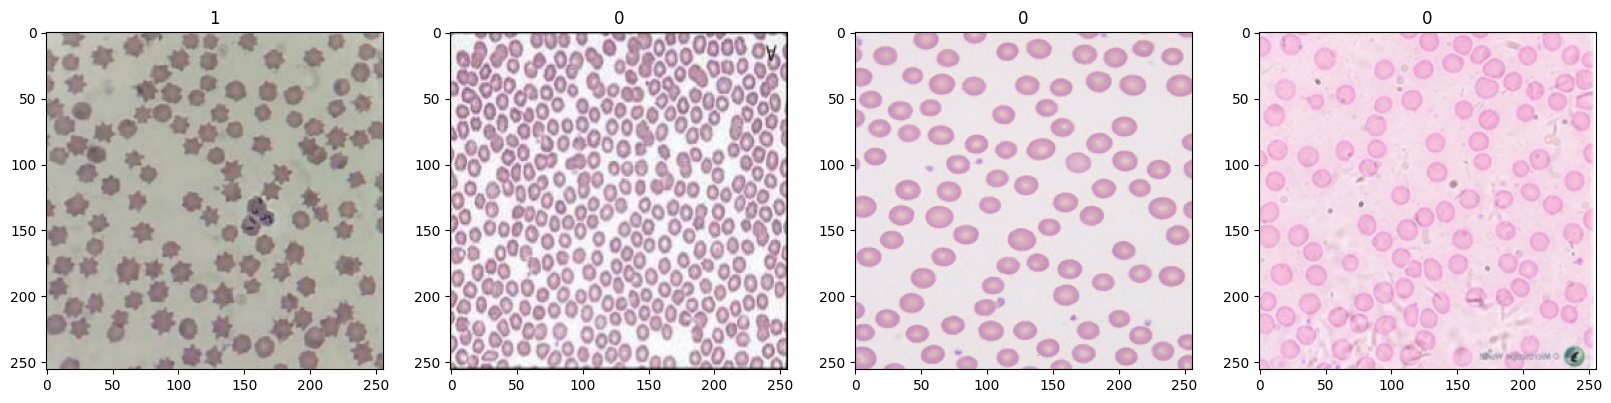

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
data = data.map(lambda x,y: (x/255, y))


In [38]:
len(data)

19

In [ ]:
data.as_numpy_iterator().next()

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [41]:
test_size

1

In [42]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [43]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

In [49]:
logdir='logs'

In [50]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
13/13 [==============================] - 37s 2s/step - loss: 0.6665 - accuracy: 0.6346 - val_loss: 0.5249 - val_accuracy: 0.6806
Epoch 2/40
13/13 [==============================] - 37s 3s/step - loss: 0.4733 - accuracy: 0.7019 - val_loss: 0.4920 - val_accuracy: 0.7500
Epoch 3/40
13/13 [==============================] - 36s 3s/step - loss: 0.4424 - accuracy: 0.8397 - val_loss: 0.3756 - val_accuracy: 0.9028
Epoch 4/40
13/13 [==============================] - 37s 3s/step - loss: 0.3400 - accuracy: 0.8590 - val_loss: 0.4028 - val_accuracy: 0.8750
Epoch 5/40
13/13 [==============================] - 39s 3s/step - loss: 0.3372 - accuracy: 0.8878 - val_loss: 0.2489 - val_accuracy: 0.8611
Epoch 6/40
13/13 [==============================] - 34s 2s/step - loss: 0.4032 - accuracy: 0.7917 - val_loss: 0.4484 - val_accuracy: 0.7639
Epoch 7/40
13/13 [==============================] - 35s 2s/step - loss: 0.4293 - accuracy: 0.8045 - val_loss: 0.2780 - val_accuracy: 0.9167
Epoch 8/40
13/13 [==

In [117]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
13/13 [==============================] - 37s 3s/step - loss: 0.0956 - accuracy: 0.9840 - val_loss: 0.0614 - val_accuracy: 1.0000
Epoch 2/40
13/13 [==============================] - 33s 2s/step - loss: 0.0983 - accuracy: 0.9583 - val_loss: 0.0646 - val_accuracy: 1.0000
Epoch 3/40
13/13 [==============================] - 37s 3s/step - loss: 0.0492 - accuracy: 0.9968 - val_loss: 0.0452 - val_accuracy: 1.0000
Epoch 4/40
13/13 [==============================] - 36s 3s/step - loss: 0.0976 - accuracy: 0.9904 - val_loss: 0.2538 - val_accuracy: 0.9028
Epoch 5/40
13/13 [==============================] - 37s 2s/step - loss: 0.5339 - accuracy: 0.8397 - val_loss: 0.3941 - val_accuracy: 0.7639
Epoch 6/40
13/13 [==============================] - 33s 2s/step - loss: 0.3675 - accuracy: 0.8429 - val_loss: 0.1509 - val_accuracy: 0.9722
Epoch 7/40
13/13 [==============================] - 33s 2s/step - loss: 0.3648 - accuracy: 0.7885 - val_loss: 0.3096 - val_accuracy: 0.8472
Epoch 8/40
13/13 [==

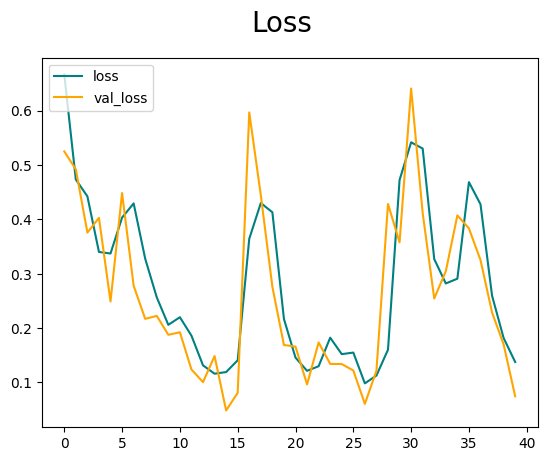

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

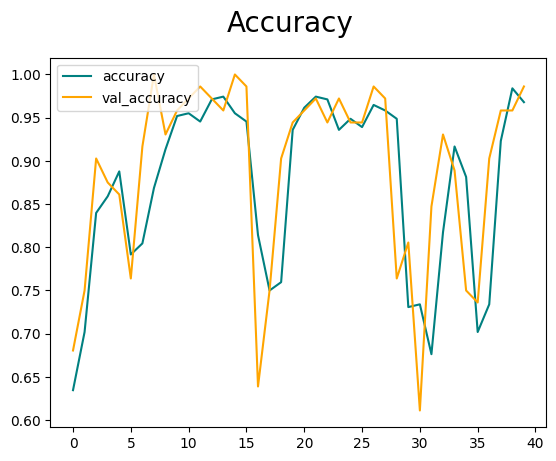

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [118]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [119]:
re = Recall()
acc = BinaryAccuracy()
pre = Precision()

In [120]:
len(test)

1

In [121]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    print(y)
    print(yhat)
    pre.update_state(y, yhat)
    print(pre)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 416ms/step
[0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1]
[[3.0811571e-03]
 [1.0000000e+00]
 [9.9936849e-01]
 [1.6789579e-06]
 [1.2447116e-02]
 [1.0000000e+00]
 [9.9999988e-01]
 [3.3851719e-01]
 [1.0000000e+00]
 [8.6476609e-07]
 [7.1916706e-03]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.7642286e-04]
 [4.2231809e-03]
 [1.2169597e-02]
 [9.9267584e-01]
 [9.9999988e-01]
 [1.0000000e+00]
 [2.4146774e-04]
 [9.9999386e-01]
 [1.0000000e+00]]
Precision(name=precision_1,dtype=float32,thresholds=None,top_k=None,class_id=None)


In [122]:
print(f'Precision:{pre.result().numpy()}, Recall ={re.result().numpy()}, Accuracy={acc.result()}')

Precision:1.0, Recall =1.0, Accuracy=1.0


In [59]:
import cv2

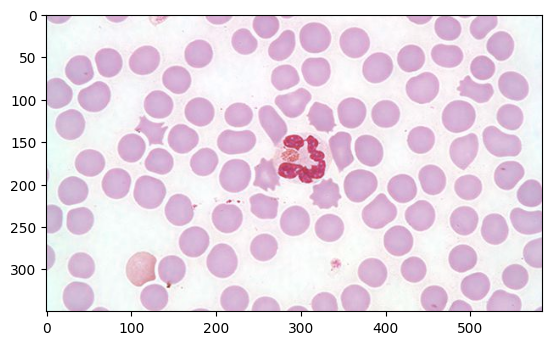

In [60]:
img = cv2.imread('/content/drive/MyDrive/data_classification/Positive/A2.jpg')
plt.imshow(img)
plt.show()

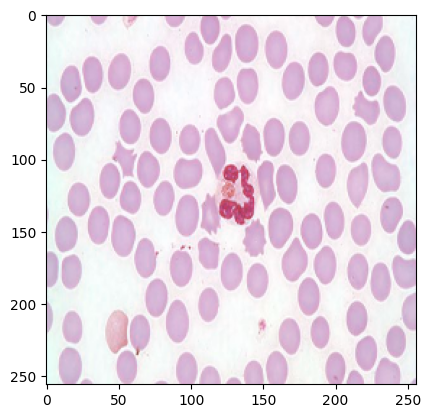

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [63]:
yhat

array([[0.99999446]], dtype=float32)

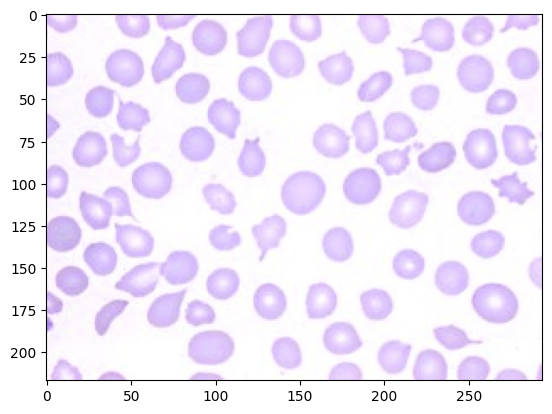

In [135]:
img = cv2.imread('/content/drive/MyDrive/data_classification/Negative/U1.jpg')
plt.imshow(img)
plt.show()

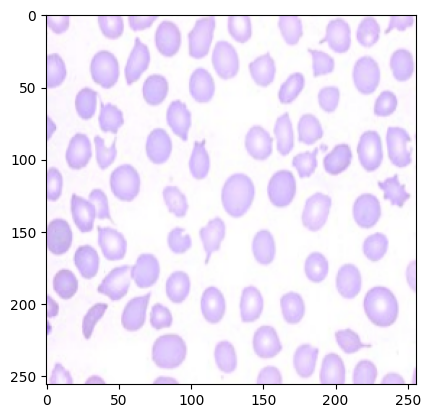

In [136]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

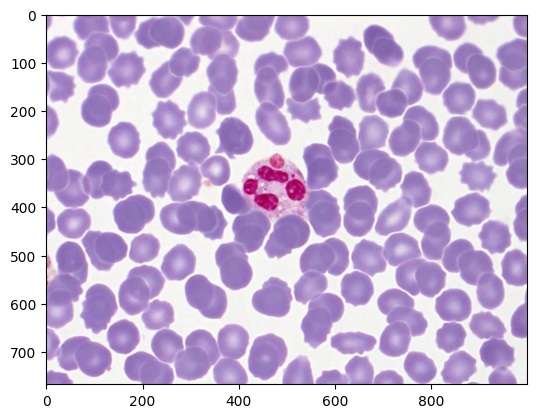

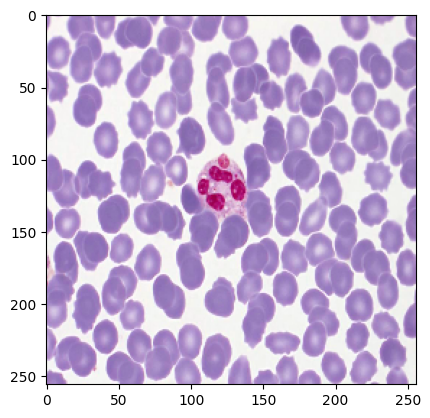

In [131]:
img = cv2.imread('/content/drive/MyDrive/data_diseases/anaplasmosis/A3.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

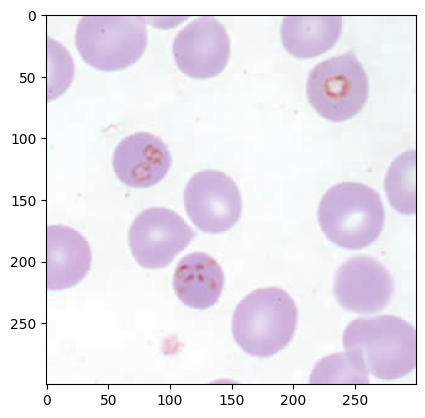

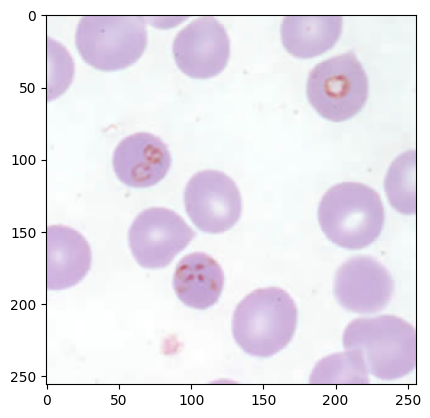

In [125]:
img = cv2.imread('/content/drive/MyDrive/data_diseases/babesiosis/B2.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

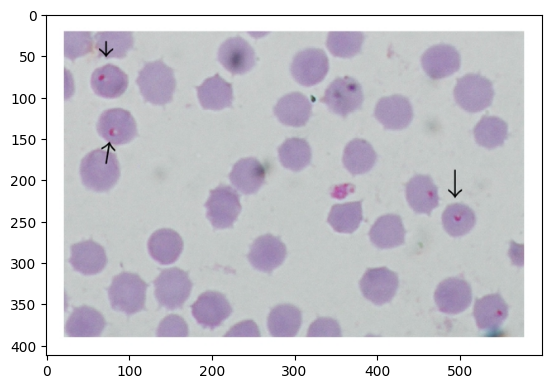

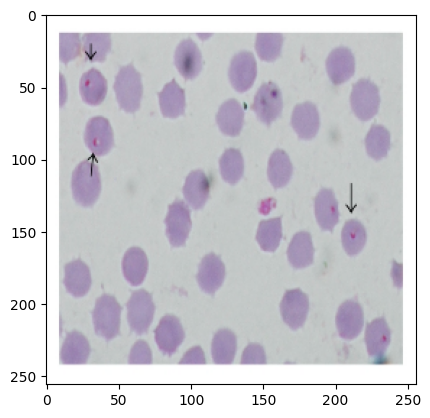

In [128]:
img = cv2.imread('/content/drive/MyDrive/data_diseases/theileriosis/T4.jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [137]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 44ms/step


array([[0.11207057]], dtype=float32)

In [138]:
if yhat > 0.5: 
    print(f'Blood Sample has Haemoprotozoan infection')
else:
    print(f'Blood Sample is not infected')

Blood Sample is not infected


In [70]:
from tensorflow.keras.models import load_model

In [123]:
model.save(os.path.join('models','binaryClassifierV2.h5'))

In [124]:
new_model = load_model('models/binaryClassifierV2.h5')

In [73]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


array([[0.41958115]], dtype=float32)

# New Section